# Université Paul Sabatier

EMIND1G1 - Fondements de la recherche d'information

**TP 6**

Enseignant : José G. Moreno

2020

**Etudiant : Léa BERQUEZ** 

## TP 6. Catégorisation de documents texte



Nous allons utiliser l'ensemble de données "Movie Genre Prediction". L'ensemble de données comporte 21 lignes allant de la description du film au genre du film.
La classification des films n'est pas incluse dans l'ensemble de données.

Télécharge et décompretion du fichier pour le TP

In [1]:
!gdown --id 1z3xWjWvZeCqgO6VCqXXg_4oh7xOmL3ia
!unzip rottentomatosdata.zip

Downloading...
From: https://drive.google.com/uc?id=1z3xWjWvZeCqgO6VCqXXg_4oh7xOmL3ia
To: /content/rottentomatosdata.zip
12.7MB [00:00, 111MB/s]
Archive:  rottentomatosdata.zip
replace all_movie.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: all_movie.csv           


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import graphviz 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import tree
from sklearn.tree import export_text
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("all_movie.csv")[['Title','Description','Genre']]
df =  df.dropna()
df = df.reset_index(drop=True)
df

,Title,Description,Genre
0,The Mummy: Tomb of the Dragon Emperor,The Fast and the Furious director Rob Cohen co...,Action
1,The Masked Saint,The journey of a professional wrestler who bec...,Action
2,Spy Hard,"Dead pan Leslie Nielsen stars as Dick Steele, ...",Action
3,Der Baader Meinhof Komplex (The Baader Meinhof...,Director Uli Edel teams with screenwriter Bern...,Action
4,Apocalypse Now,One of a cluster of late-1970s films about the...,Action
...,...,...,...
29279,Mysterious Island,Filmed at least nine times over the last nine ...,SciFi
29280,The Absent-Minded Professor,Fred MacMurray stars in this Walt Disney comed...,SciFi
29281,Zardoz,A resident of 23rd-century Earth becomes invol...,SciFi
29282,Supernova,Supernova chronicles the search and rescue pat...,SciFi


Dans ce TP, nous allons utiliser les colonnes Title et Description pour predire le Genre.

### 1. Représentation

Construir les vecteurs pour chaque page en utilisant TF-IDF. Vous pouvez utiliser la méthode TfidfVectorizer de scikitlearn pour le faire. Voici le code

In [4]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=3,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform([str(t)+" "+str(d) for t,d,_ in df.values])
tfidf.shape

(29284, 41709)

In [5]:
print(tfidf) 

  (0, 32002)	0.03118120445729874
  (0, 5261)	0.04867105295209675
  (0, 19600)	0.044454108782206306
  (0, 8402)	0.08111905983943633
  (0, 30280)	0.09763208894480488
  (0, 31468)	0.09519107117108411
  (0, 19390)	0.052427277266644215
  (0, 13274)	0.03415454034403577
  (0, 8136)	0.07395548297304955
  (0, 24653)	0.07554813860521978
  (0, 3446)	0.04774791778407758
  (0, 7987)	0.11434672669742366
  (0, 28292)	0.0535527491843945
  (0, 22578)	0.06547675746890441
  (0, 34763)	0.11434672669742366
  (0, 8033)	0.0754481216836801
  (0, 13209)	0.07083081812647407
  (0, 13182)	0.08718391654187543
  (0, 8558)	0.0521589287940532
  (0, 13775)	0.04914139809810477
  (0, 10976)	0.08638691901263082
  (0, 41148)	0.03216479359381073
  (0, 10264)	0.07595709749882684
  (0, 28770)	0.05063298025024232
  (0, 5841)	0.07247876691452668
  :	:
  (29283, 34833)	0.12657911928980548
  (29283, 7022)	0.14207731628754078
  (29283, 30267)	0.10746253791208239
  (29283, 2583)	0.13894407727136815
  (29283, 21830)	0.1058023721895

### 2. Visualisation
Cette partie ne fait pas partie de la catégorisation, cependant, il est improtant de toujours connaître le problème qu'on essaie d'addreser. Pour cela, la visualisation du dataset peut nous venir en aide. Dans ce point un va visualiser la collaction à l'aide de t-SNE. 

In [ ]:
X_embedded = TSNE(n_components=2).fit_transform(tfidf)

In [ ]:
df['Genre'].unique()

array(['Action', 'Art&Foreign', 'Classics', 'Comedy', 'Documentary',
       'Drama', 'Horror', 'Kids&Family', 'Mystery', 'Romance', 'SciFi'],
      dtype=object)

In [ ]:
markermap = [x+y for x in ['b','g','r','c','m','y','k','w'] for y in ['o','x']]

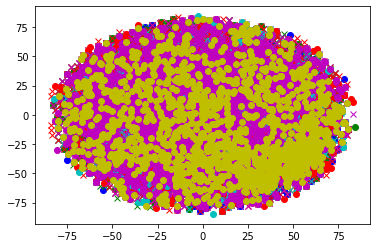

In [ ]:
for i, c in enumerate(list(df['Genre'].unique())):
  ids = df.index[df['Genre'] == c].tolist()
  plt.plot([x[0] for x in X_embedded[ids]],[x[1] for x in X_embedded[ids]], markermap[i])

plt.savefig('foo.png')

Dans ce cas, notre problème senble être dificile car il n'existe pas une séparation simple de données dans un espace de 2 dimmension. Cependant, celle-ci ce n'est pas une évalaution rigurose du problème.

## 3. Entraîner un modèle

Pour entraîner un modèle et en suite évaluer ce modèle, il faut utiliser un partie de notre collection pour l'apprentissage de paramètres et une autre partie pour l'évaluation. Il existent d'autres façon plus élaborées de faire, mais nous allons utiliser celle-ci. Donc d'abord nous allons 

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [6]:
traintfidf = tfidf[[i for i in range(len(df)) if msk[i]]]

In [14]:
clf = tree.DecisionTreeClassifier()
clf.fit(traintfidf,train['Genre'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
print(export_text(clf))

|--- feature_10886 <= 0.01
|   |--- feature_7580 <= 0.02
|   |   |--- feature_17705 <= 0.04
|   |   |   |--- feature_37483 <= 0.01
|   |   |   |   |--- feature_11214 <= 0.01
|   |   |   |   |   |--- feature_19152 <= 0.02
|   |   |   |   |   |   |--- feature_1780 <= 0.04
|   |   |   |   |   |   |   |--- feature_22234 <= 0.01
|   |   |   |   |   |   |   |   |--- feature_956 <= 0.03
|   |   |   |   |   |   |   |   |   |--- feature_28284 <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- feature_12762 <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 282
|   |   |   |   |   |   |   |   |   |   |--- feature_12762 >  0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 61
|   |   |   |   |   |   |   |   |   |--- feature_28284 >  0.05
|   |   |   |   |   |   |   |   |   |   |--- feature_6457 <= 0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 42
|   |   |   |   |   |   |   |   |   |   |--- feature_645

In [9]:
print(classification_report(test['Genre'], clf.predict(tfidf[[i for i in range(len(df)) if not msk[i]]]), target_names=df['Genre'].unique()))

              precision    recall  f1-score   support

      Action       0.04      0.06      0.05       633
 Art&Foreign       0.01      0.01      0.01       484
    Classics       0.02      0.03      0.02       274
      Comedy       0.12      0.14      0.13       755
 Documentary       0.49      0.45      0.47       325
       Drama       0.16      0.14      0.15      1584
      Horror       0.10      0.09      0.09       328
 Kids&Family       0.03      0.02      0.03       181
     Mystery       0.02      0.02      0.02       599
     Romance       0.01      0.01      0.01       349
       SciFi       0.01      0.00      0.00       350

    accuracy                           0.10      5862
   macro avg       0.09      0.09      0.09      5862
weighted avg       0.10      0.10      0.10      5862



L'arbre binaire qu'on a utilisé nous permet de bien classifier la classe Documentary, cependant les résultats pour les autre classes ne cont pas très performants.

## 6. Autres modèles
Utilisez d’autres classifieurs comme [NaiveBayes](https://scikit-learn.org/stable/modules/naive_bayes.html) ou les Support Vector Machines (SVM [link text](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)) dans votre code. 

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
import warnings
warnings.filterwarnings('ignore')

###Classifieur Multinomial : 

In [21]:
clf2 = MultinomialNB() 
clf2.fit(traintfidf,train['Genre'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
predict_NB = clf2.predict(tfidf[[i for i in range(len(df)) if not msk[i]]])

In [16]:
print(classification_report(test['Genre'], predict_NB, target_names=df['Genre'].unique()))

              precision    recall  f1-score   support

      Action       0.16      0.02      0.04       633
 Art&Foreign       0.33      0.00      0.00       484
    Classics       0.00      0.00      0.00       274
      Comedy       0.12      0.01      0.01       755
 Documentary       0.40      0.01      0.01       325
       Drama       0.27      0.98      0.43      1584
      Horror       0.25      0.01      0.02       328
 Kids&Family       0.00      0.00      0.00       181
     Mystery       0.00      0.00      0.00       599
     Romance       0.00      0.00      0.00       349
       SciFi       0.00      0.00      0.00       350

    accuracy                           0.27      5862
   macro avg       0.14      0.09      0.05      5862
weighted avg       0.17      0.27      0.12      5862



On remarque que l'on a une bonne classification pour la catégorie Documentary mais les autres résultats ne sont pas performants. En effet, on a beaucoup de précision égale à 0. 


###Classifieur Bernouilli : 

In [17]:
from sklearn.naive_bayes import BernoulliNB 

In [18]:
bern = BernoulliNB() 
bern.fit(traintfidf,train['Genre'])
predict_bernoulli = bern.predict(tfidf[[i for i in range(len(df)) if not msk[i]]])

In [19]:
print(classification_report(test['Genre'], predict_bernoulli, target_names=df['Genre'].unique()))

              precision    recall  f1-score   support

      Action       0.18      0.18      0.18       633
 Art&Foreign       0.06      0.03      0.04       484
    Classics       0.14      0.13      0.13       274
      Comedy       0.28      0.25      0.27       755
 Documentary       0.68      0.56      0.61       325
       Drama       0.30      0.53      0.38      1584
      Horror       0.21      0.13      0.16       328
 Kids&Family       0.04      0.01      0.02       181
     Mystery       0.13      0.11      0.12       599
     Romance       0.04      0.01      0.02       349
       SciFi       0.09      0.04      0.06       350

    accuracy                           0.26      5862
   macro avg       0.19      0.18      0.18      5862
weighted avg       0.22      0.26      0.23      5862



On a de bon résultats pour la catégorie Documentary, mais les autres résultats ne sont pas très performants. On voit déjà une amélioration par rapport à précédemment puisque aucune précision n'est égale à 0, les précisions sont plus hautes.

###Classifieur SVM : 

In [20]:
from sklearn.svm import SVC

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler(with_mean=False)

In [23]:
svc = make_pipeline(sc, SVC(gamma='auto'))

In [24]:
svc.fit(traintfidf,train['Genre'])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=False, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [25]:
print(classification_report(test['Genre'], svc.predict(tfidf[[i for i in range(len(df)) if not msk[i]]]), target_names=df['Genre'].unique()))

              precision    recall  f1-score   support

      Action       0.01      0.01      0.01       633
 Art&Foreign       0.00      0.00      0.00       484
    Classics       0.00      0.00      0.00       274
      Comedy       0.01      0.01      0.01       755
 Documentary       0.13      0.02      0.04       325
       Drama       0.21      0.48      0.29      1584
      Horror       0.01      0.00      0.00       328
 Kids&Family       0.00      0.00      0.00       181
     Mystery       0.00      0.00      0.00       599
     Romance       0.00      0.00      0.00       349
       SciFi       0.01      0.00      0.00       350

    accuracy                           0.13      5862
   macro avg       0.03      0.05      0.03      5862
weighted avg       0.07      0.13      0.08      5862



Cette méthode semble moins éfficace que les précédentes, cela est peut-être dûe aux paramètres utilisés. Néamoins, contrairement à précédemment, c'est la classe Drama qui a la meilleure précision.

## 7. Validation croisée
Trouvez les meilleurs paramètres pour chaque classifieur en utilisant la [validation croisée](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) et un [grid search](https://scikit-learn.org/stable/modules/grid_search.html) de méilleurs paramètres sur l'ensemble d'entraînement. Quelle méthode a les meilleurs performances ? 

On sait qu'un modèle est évalué avec une base de test différente de la base d'apprentissage. La performance dépend alors du découpage, une bonne perfomance (respectivement une mauvaise performance) peut être du à un découpage avantageux (respectivement non avantageux). 
Pour être sur que le modèle est robuste, on doit réaliser cela plusieurs fois. On utilise alors la validation croisée. 

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, r2_score

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import sklearn 

In [9]:
import warnings
warnings.filterwarnings('ignore')

La méthode gridSearch permet de contourner le tri des données. En effet, si les données sont triées, on va chercher à tester sur une base d'apprentissage non entrainée sur ces données. Par exemple si la base d'apprentissage ne se base que sur les films des catégories Classic et Comedy il va avoir du mal à reconnaitre les autres. 
Elle utilise la validation croisée, on a va essayer de retrouver les meilleurs paramètres. 


La fonction suivante permet de trouver les meilleurs paramètres pour une méthode parmis ceux passés en entrée. 

In [10]:
def bestParam(methode, tuned_parameters, scores): 
  for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    search = GridSearchCV(
        methode, tuned_parameters, scoring='%s_macro' % score
    )
    search.fit(traintfidf,train['Genre'])

    print("Best parameters set found on development set:")
    print()
    print(search.best_params_)
    print()
    print("Best score : " + str(search.best_score_))
    print() 
    print()

  print("Globality : ")
  print() 
  print("Detailed classification report:")
  print()
  print(print(classification_report(test['Genre'], search.predict(tfidf[[i for i in range(len(df)) if not msk[i]]]), target_names=df['Genre'].unique())))
  print()


  search = GridSearchCV(methode, tuned_parameters, scoring=None)
  search.fit(traintfidf,train['Genre'])
  print("Best parameters set found on development set:")
  print()
  print(search.best_params_)
  print()
  print("Best score : " + str(search.best_score_))
  print() 

### **Tree classifieur :** 


Le score : 

Ici on utilise le score par défaut. 

In [15]:
scores_tree =  cross_val_score(clf, traintfidf,train['Genre'], cv=5)

In [16]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

Accuracy: 0.14 (+/- 0.01)


La précision de ce modèle sur les données de test est d'envrion 14%. 

In [32]:
scores = ['precision', 'recall', 'f1']

In [34]:
tuned_parameters_tree = [{'criterion': ['gini', 'entropy'], 
                          'splitter' : ['best', 'random'], 
                          'max_depth' : [None, 0, 10, 100],                         
                          }]

In [35]:
bestParam(tree.DecisionTreeClassifier(), tuned_parameters_tree, scores)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

Best score : 0.2924445727339012


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

Best score : 0.19485560763201384


# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

Best score : 0.2004295636116153


Globality : 

Detailed classification report:

              precision    recall  f1-score   support

      Action       0.23      0.08      0.12       633
 Art&Foreign       0.15      0.02      0.03       484
    Classics       0.11      0.02      0.03       274
      Comedy       0.41      0.27      0.33       755
 Documentary       0.67      0.46      0.55       325
       Drama       0.31      0.81      0.44      1584
      Horror       0.34      0.18    

On remarque ceci : 


*   avec la précision : 
        le meilleur score est de 0,29 
        avec les paramètres : {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
*   avec recall : 
        le meilleur score est de 0,19 
        avec les paramètres : {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
*   avec f1 : 
        le meilleur score est de 0,20 
        avec les paramètres : {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'} 

En globalité, 
le meilleur score est de 0,31 
avec les paramètres : {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'} 

On en déduit donc que les meilleurs paramètres parmi ceux passés en entrées sont : {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}




### **Classifieur MultinomialNB :** 


Le score : 

Ici on utilise le score par défaut. 

In [22]:
scores =  cross_val_score(clf2, traintfidf,train['Genre'], cv=5)

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.27 (+/- 0.00)


La précision de ce modèle sur les données de tests est d'environ 27%. 

In [ ]:
p1 = [0.20, 0.20, 0.20, 0.20, 0.20,0.20, 0.20, 0.20, 0.20, 0.20, 0.20 ]
p2 = [1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11 ]

In [ ]:
tuned_parameters = [{'alpha': [1.0, 2.0, 4.0, 6.0, 10.0, 100.0, 1000.0], 'class_prior' : [None, p1, p2], 'fit_prior' : [True, False]}]

In [ ]:
scores = ['precision', 'recall', 'f1']

In [ ]:
bestParam(MultinomialNB(), tuned_parameters, scores)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'alpha': 2.0, 'class_prior': None, 'fit_prior': False}

Best score : 0.21340740224326193


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'alpha': 1.0, 'class_prior': None, 'fit_prior': False}

Best score : 0.11546784466365005


# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'alpha': 1.0, 'class_prior': None, 'fit_prior': False}

Best score : 0.09270499046614193


Globality : 

Detailed classification report:

              precision    recall  f1-score   support

      Action       0.18      0.11      0.14       609
 Art&Foreign       0.07      0.00      0.01       465
    Classics       0.08      0.00      0.01       312
      Comedy       0.19      0.08      0.11       746
 Documentary       0.67      0.12      0.21       339
       Drama       0.28      0.85      0.42      1490
      Horror       0.31      0.10      0.16 

On remarque ceci : 


*   avec la précision : 
        le meilleur score est de 0,21 
        avec les paramètres : {'alpha': 2.0, 'class_prior': None, 'fit_prior': False} 
*   avec recall : 
        le meilleur score est de 0,11 
        avec les paramètres : {'alpha': 1.0, 'class_prior': None, 'fit_prior': False}
*   avec f1 : 
        le meilleur score est de 0,09 
        avec les paramètres : {'alpha': 1.0, 'class_prior': None, 'fit_prior': False}

En globalité, 
le meilleur score est de 0,274 
avec les paramètres : {'alpha': 1.0, 'class_prior': None, 'fit_prior': False}

On remarque également que la précision est moins bonne que la méthode précédente. 

### **Classifieur  Bernoulli:** 


Le score : 

Ici on utilise le score par défaut. 

In [ ]:
scoresbern =  cross_val_score(bern, traintfidf,train['Genre'], cv=5)

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresbern.mean(), scoresbern.std() * 2))

La précision de ce classifieur sur l'ensemble des données en fractionnant les données, en ajustant un modèle et en calculant le score 5 fois à la suite est de 27%. 

In [ ]:
tuned_parameters_bern = [{'alpha': [0.5, 0.75, 1.0, 2.0, 4.0, 6.0, 10.0, 100.0, 1000.0], 'class_prior' : [None, p1, p2], 'binarize': [0.0, 0.1, 0.2, 0.5, 0.7, 1, 2.0], 'fit_prior' : [True, False]}]

In [ ]:
bestParam(BernoulliNB(), tuned_parameters_bern, scores)

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': False}

Best score : 0.23543363020017383


# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': False}

Best score : 0.18446183103465758


# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': False}

Best score : 0.19278317331759584


Globality : 

Detailed classification report:

              precision    recall  f1-score   support

      Action       0.21      0.23      0.22       609
 Art&Foreign       0.10      0.05      0.07       465
    Classics       0.18      0.13      0.15       312
      Comedy       0.28      0.27      0.27       746
 Documentary       0.69      0.54      0.60       339
       Drama       0.30      0.49      0.37    

On remarque ceci : 


*   avec la précision : 
        le meilleur score est de 0,23 
        avec les paramètres : {'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': False}
*   avec recall : 
        le meilleur score est de 0,18 
        avec les paramètres : {'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': False}
*   avec f1 : 
        le meilleur score est de 0,19 
        avec les paramètres : {'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': False}

En globalité, 
le meilleur score est de 0,27 
avec les paramètres : {'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': False}

On remarque également que la précision est meilleure que la méthode précédente. On remarque aussi que les scores sont dans l'ensemble meilleurs. 

### **Classifieur  SVM:** 


Le score : 

In [ ]:
scoresSVM =  cross_val_score(SVC(), traintfidf,train['Genre'], cv=5)

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scoresSVM.mean(), scoresSVM.std() * 2))

Malheureusement, juste avant de rendre le TP j'ai relancé mais l'excution met énormément de temps, je ne peux pas vous afficher le résultats de la ligne de code mais j'ai gardé le resultats dans la zone texte. 
La précision de ce classifieur sur l'ensemble des données en fractionnant les données, en ajustant un modèle et en calculant le score 5 fois à la suite est de 27%. 

In [11]:
scores = ['precision']

In [13]:
tuned_parameters_svc = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                          'C': [1, 10, 100, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
bestParam(SVC(), tuned_parameters_svc, scores)

# Tuning hyper-parameters for precision



Malheureusement j'ai laissé tourné l'algorothme bestParam pour SVC pendant plus de 3h et je n'ai pas réussi à aller au bout de l'exécution. 

On sait néanmoins que le score global est d'environ 27% ce qui est équivalent aux classifieur précédent. 

##Conclusion

**Precision :** 
Si on se base sur les valeurs de la précision, on a Tree Classifieur (0,29) > Bernoulli (0,21) > MultinomialNB (0,23) 

On remarque alors que si on se base sur la précision, c'est Tree Classifieur qui est le plus performant avec les paramètres : {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'} 

**Recall :** 
Si on se base sur les valeurs de recall, on a on a Tree Classifieur (0,19) > Bernoulli (0,18) > MultinomialNB (0,11) 

On remarque alors que si on se base sur recall, c'est Tree Classifieur qui est le plus performant avec les paramètres : {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'} 

**F1 :** 
Si on se base sur les valeurs de F1, on a on a Tree Classifieur (0,20) > Bernoulli (0,19) > MultinomialNB (0,09) 

On remarque alors que si on se base sur F1, c'est Tree Classifieur qui est le plus performant avec les paramètres : {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

**Global :** 
Si on se base sur les valeurs globales, on a on a Tree Classifieur (0,31) > Bernoulli (0,275) >= SVM (0,27) >= MultinomialNB (0,274) 

On remarque alors que si on se base sur les valeurs globales, c'est Tree Classifieur qui est le plus performant avec les paramètres : {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

On peut en conclure que Tree Classifieur est plus performant que les autres. Le classifieur de bernoulli permet d'obtenir des résultats plutôt satisfaisant et plus rapidement que Tree Classifieur. 

Je pense que SVM pourrait amener de meilleurs résultats avec les bons paramètres mais l'exécution est très longue, cela prend énormément de temps (15 mins environ rien que pour un ensemble de paramètres) et je n'ai pas réussi à atteindre la fin d'exécution pour trouver les meilleurs paramètres (le notebook stoppe l'exécution avant). 

Sources : 
* pour trouver les meilleurs paramètres je me suis appuyée sur : https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
* les liens déjà présents dans le google collab 